In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print("numpy",np.__version__)

numpy,pandas 2.0.2


In [ ]:
print("pandas",pd.__version__)

pandas 2.2.2


In [ ]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [ ]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0.0,NaN,NaN,NaN


In [ ]:
match.shape

(1095, 20)

In [ ]:
#feature extraction (having relevant features)

In [ ]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [ ]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,829727,2015,Visakhapatnam,16-04-2015,League,AM Rahane,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,wickets,6.0,128.0,20.0,N,NaN,PG Pathak,S Ravi,829727,127
469,829729,2015,Mumbai,17-04-2015,League,A Nehra,Wankhede Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,...,wickets,6.0,184.0,20.0,N,NaN,AK Chaudhary,M Erasmus,829729,183
470,829731,2015,Visakhapatnam,18-04-2015,League,JP Duminy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,...,runs,4.0,168.0,20.0,N,NaN,PG Pathak,S Ravi,829731,167
471,829733,2015,Pune,18-04-2015,League,AD Russell,Maharashtra Cricket Association Stadium,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,...,wickets,4.0,156.0,20.0,N,NaN,SD Fry,CK Nandan,829733,155


In [ ]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad'],
      dtype=object)

In [ ]:
teams ={"Mumbai Indians":"Mumbai Indians",
          "Chennai Super Kings":"Chennai Super Kings",
          "Kolkata Knight Riders":"Kolkata Knight Riders",
          "Royal Challengers Bangalore":"Royal Challengers Bangalore",
          "Royal Challengers Bengaluru":"Royal Challengers Bangalore",
          "Rajasthan Royals":"Rajasthan Royals",
          "Kings XI Punjab":"Kings XI Punjab",
          "Punjab Kings":"Kings XI Punjab",
          "Sunrisers Hyderabad":"Sunrisers Hyderabad",
          "Deccan Chargers":"Sunrisers Hyderabad",
          "Delhi Capitals":"Delhi Capitals",
          "Delhi Daredevils":"Delhi Capitals",
          "Gujarat Titans":"Gujarat Titans",
          "Gujarat Lions":"Gujarat Titans",
          "Lucknow Super Giants":"Lucknow Super Giants",
}

In [ ]:
match_df=match_df[match_df['team1'].isin(teams)]

In [ ]:
match_df=match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,829727,2015,Visakhapatnam,16-04-2015,League,AM Rahane,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,wickets,6.0,128.0,20.0,N,NaN,PG Pathak,S Ravi,829727,127
469,829729,2015,Mumbai,17-04-2015,League,A Nehra,Wankhede Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,...,wickets,6.0,184.0,20.0,N,NaN,AK Chaudhary,M Erasmus,829729,183
470,829731,2015,Visakhapatnam,18-04-2015,League,JP Duminy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,...,runs,4.0,168.0,20.0,N,NaN,PG Pathak,S Ravi,829731,167
471,829733,2015,Pune,18-04-2015,League,AD Russell,Maharashtra Cricket Association Stadium,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,...,wickets,4.0,156.0,20.0,N,NaN,SD Fry,CK Nandan,829733,155


In [ ]:
match_df.shape

(414, 22)

In [ ]:
match_df['method'].value_counts()

,count
method,
D/L,8


In [ ]:
match_df=match_df.fillna(0)

In [ ]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,0,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,0,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,0,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,0,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,0,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,829727,2015,Visakhapatnam,16-04-2015,League,AM Rahane,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,wickets,6.0,128.0,20.0,N,0,PG Pathak,S Ravi,829727,127
469,829729,2015,Mumbai,17-04-2015,League,A Nehra,Wankhede Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,...,wickets,6.0,184.0,20.0,N,0,AK Chaudhary,M Erasmus,829729,183
470,829731,2015,Visakhapatnam,18-04-2015,League,JP Duminy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,...,runs,4.0,168.0,20.0,N,0,PG Pathak,S Ravi,829731,167
471,829733,2015,Pune,18-04-2015,League,AD Russell,Maharashtra Cricket Association Stadium,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,...,wickets,4.0,156.0,20.0,N,0,SD Fry,CK Nandan,829733,155


In [ ]:
match_df=match_df[match_df['method']==0]

In [ ]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df=match_df.merge(delivery,on='match_id')

In [ ]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [ ]:
delivery_df.shape

(47192, 20)

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0.0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0.0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0.0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0.0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97317,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,1,RV Uthappa,RG More,AD Russell,1,0,1,NaN,0.0,NaN,NaN,NaN
97318,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,2,AD Russell,RG More,RV Uthappa,1,0,1,NaN,0.0,NaN,NaN,NaN
97319,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,3,RV Uthappa,RG More,AD Russell,2,0,2,NaN,0.0,NaN,NaN,NaN
97320,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,4,RV Uthappa,RG More,AD Russell,1,0,1,NaN,0.0,NaN,NaN,NaN


In [ ]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [ ]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [ ]:
delivery_df['balls_left']=120-(delivery_df['over']*6+delivery_df['ball'])

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0.0,NaN,NaN,NaN,1,221,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0.0,NaN,NaN,NaN,2,220,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0.0,NaN,NaN,NaN,2,220,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0.0,NaN,NaN,NaN,3,219,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0.0,NaN,NaN,NaN,4,218,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97317,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,1,RV Uthappa,...,0,1,NaN,0.0,NaN,NaN,NaN,161,4,5
97318,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,2,AD Russell,...,0,1,NaN,0.0,NaN,NaN,NaN,162,3,4
97319,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,3,RV Uthappa,...,0,2,NaN,0.0,NaN,NaN,NaN,164,1,3
97320,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,4,RV Uthappa,...,0,1,NaN,0.0,NaN,NaN,NaN,165,0,2


In [ ]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0.0,0,NaN,NaN,1,221,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0.0,0,NaN,NaN,2,220,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0.0,0,NaN,NaN,2,220,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0.0,0,NaN,NaN,3,219,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0.0,0,NaN,NaN,4,218,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97317,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,1,RV Uthappa,...,0,1,NaN,0.0,0,NaN,NaN,161,4,5
97318,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,2,AD Russell,...,0,1,NaN,0.0,0,NaN,NaN,162,3,4
97319,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,3,RV Uthappa,...,0,2,NaN,0.0,0,NaN,NaN,164,1,3
97320,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,4,RV Uthappa,...,0,1,NaN,0.0,0,NaN,NaN,165,0,2


In [ ]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0.0,0,NaN,NaN,1,221,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0.0,0,NaN,NaN,2,220,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0.0,0,NaN,NaN,2,220,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0.0,0,NaN,NaN,3,219,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0.0,0,NaN,NaN,4,218,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97317,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,1,RV Uthappa,...,0,1,NaN,0.0,0,NaN,NaN,161,4,5
97318,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,2,AD Russell,...,0,1,NaN,0.0,0,NaN,NaN,162,3,4
97319,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,3,RV Uthappa,...,0,2,NaN,0.0,0,NaN,NaN,164,1,3
97320,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,4,RV Uthappa,...,0,1,NaN,0.0,0,NaN,NaN,165,0,2


In [ ]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0.0,0,NaN,NaN,1,221,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0.0,0,NaN,NaN,2,220,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0.0,0,NaN,NaN,2,220,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0.0,0,NaN,NaN,3,219,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0.0,0,NaN,NaN,4,218,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97317,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,1,RV Uthappa,...,0,1,NaN,0.0,0,NaN,NaN,161,4,5
97318,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,2,AD Russell,...,0,1,NaN,0.0,0,NaN,NaN,162,3,4
97319,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,3,RV Uthappa,...,0,2,NaN,0.0,0,NaN,NaN,164,1,3
97320,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,4,RV Uthappa,...,0,1,NaN,0.0,0,NaN,NaN,165,0,2


In [ ]:
wickets=delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

In [ ]:
delivery_df['wickets']=10-wickets
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0.0,0,NaN,NaN,1,221,119,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0.0,0,NaN,NaN,2,220,118,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0.0,0,NaN,NaN,2,220,117,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0.0,0,NaN,NaN,3,219,116,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0.0,0,NaN,NaN,4,218,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97317,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,1,RV Uthappa,...,1,NaN,0.0,0,NaN,NaN,161,4,5,7
97318,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,2,AD Russell,...,1,NaN,0.0,0,NaN,NaN,162,3,4,7
97319,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,3,RV Uthappa,...,2,NaN,0.0,0,NaN,NaN,164,1,3,7
97320,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,4,RV Uthappa,...,1,NaN,0.0,0,NaN,NaN,165,0,2,7


In [ ]:
#crr=runs/overs
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])


In [ ]:
#rrr=(runs left)/(overs left)
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0.0,0,NaN,NaN,1,221,119,10,6.000000,11.142857
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0.0,0,NaN,NaN,2,220,118,10,6.000000,11.186441
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0.0,0,NaN,NaN,2,220,117,10,4.000000,11.282051
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0.0,0,NaN,NaN,3,219,116,10,4.500000,11.327586
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0.0,0,NaN,NaN,4,218,115,10,4.800000,11.373913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97317,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,1,RV Uthappa,...,0.0,0,NaN,NaN,161,4,5,7,8.400000,4.800000
97318,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,2,AD Russell,...,0.0,0,NaN,NaN,162,3,4,7,8.379310,4.500000
97319,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,3,RV Uthappa,...,0.0,0,NaN,NaN,164,1,3,7,8.410256,2.000000
97320,829723,Kolkata,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Chennai Super Kings,19,4,RV Uthappa,...,0.0,0,NaN,NaN,165,0,2,7,8.389831,0.000000


In [ ]:
def result(row):
  return 1 if row['batting_team']==row['winner'] else 0

In [ ]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [ ]:
print(delivery_df.columns)

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'extras_type',
       'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder',
       'current_score', 'runs_left', 'balls_left', 'wickets', 'crr', 'rrr',
       'result'],
      dtype='object')


In [ ]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr', 'result']]

In [ ]:
final_df=final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
24815,Kolkata Knight Riders,Rajasthan Royals,Durban,11,14,4,101,5.09434,4.714286,1


In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df=final_df[final_df['balls_left']!=0]

In [ ]:
final_df.dropna(inplace=True)

<ipython-input-536-3665e38311c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [ ]:
#model building here......

In [ ]:
X_train=final_df.iloc[:,:-1]
y_train=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=1)

In [ ]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,37631.000000,37631.000000,37631.000000,37631.000000,37631.000000,37631.000000
mean,90.559486,62.870187,7.546863,161.165024,7.161615,10.156329
std,48.791085,33.280702,2.149137,28.140736,2.211989,13.932337
min,-6.000000,-2.000000,0.000000,67.000000,0.000000,-510.000000
25%,52.000000,35.000000,6.000000,142.000000,6.000000,6.956522
50%,90.000000,64.000000,8.000000,163.000000,7.200000,8.590909
75%,127.000000,92.000000,9.000000,180.000000,8.338983,10.635014
max,246.000000,119.000000,10.000000,246.000000,30.000000,468.000000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf=ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')


In [ ]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.6.1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
for col in ['batting_team', 'bowling_team', 'city']:
    print(f"{col}: {X_train[col].apply(type).unique()}")


batting_team: [<class 'str'>]
bowling_team: [<class 'str'>]
city: [<class 'str'> <class 'int'>]


In [ ]:
X_train['city'] = X_train['city'].astype(str)
X_test['city'] = X_test['city'].astype(str)


In [ ]:
print(X_train.dtypes)


batting_team     object
bowling_team     object
city             object
runs_left         int64
balls_left        int64
wickets           int64
total_runs_x      int64
crr             float64
rrr             float64
dtype: object


In [ ]:
pipe.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8218537414965986

In [ ]:
pipe.predict_proba(X_test)[9]

array([0.41419428, 0.58580572])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [ ]:
import numpy as np

def match_progression(x_df, match_id, pipe):
    # Filter for the match_id
    match = x_df[x_df['match_id'] == match_id].copy()

    # Ensure there are rows for this match_id
    if match.empty:
        print(f"No data found for match_id {match_id}.")
        return None, None

    # Filter for deliveries at end of over (ball 6)
    match = match[match['ball'] == 6].copy()

    # Select required features and drop NaN values
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left',
                     'wickets','total_runs_x','crr','rrr']].dropna()

    # Ensure there are rows after dropping NaN values
    if temp_df.empty:
        print(f"All rows for match_id {match_id} contain NaN values.")
        return None, None

    # Remove rows where balls_left is 0
    temp_df = temp_df[temp_df['balls_left'] != 0]

    # Ensure temp_df is still not empty
    if temp_df.empty:
        print(f"All remaining rows for match_id {match_id} had balls_left = 0.")
        return None, None

    # Predict probabilities
    result = pipe.predict_proba(temp_df)

    # Add prediction results to dataframe
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)

    # Create end_of_over column
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    # Extract target runs safely
    target = temp_df['total_runs_x'].values[0]

    # Calculate runs per over
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)  # Insert target at the start
    temp_df['runs_after_over'] = np.array(runs[:-1]) - np.array(new_runs)

    # Calculate wickets per over
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)  # Assume 10 wickets at the start
    wickets.append(0)  # Assume all wickets are gone at the end
    temp_df['wickets_in_over'] = (np.array(new_wickets) - np.array(wickets))[:temp_df.shape[0]]

    print(f"Target: {target}")

    return temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']], target


In [ ]:
temp_df, target = match_progression(delivery_df, 335987, pipe)


Target: 166


In [ ]:
print(delivery_df['match_id'].unique())


[335982 335983 335984 335985 335986 335987 335988 335989 335990 335991
 335992 335993 335994 335995 335996 335997 335998 335999 336000 336001
 336003 336034 336004 336005 336006 336007 336008 336009 336010 336011
 336013 336014 336015 336016 336017 336018 336020 336021 336023 336024
 336026 336027 336028 336029 336031 336032 336033 336002 336035 336036
 336037 336012 336019 336038 336039 336040 392181 392182 392184 392185
 392188 392189 392190 392191 392192 392194 392195 392196 392197 392198
 392199 392200 392201 392202 392203 392204 392205 392206 392207 392208
 392209 392210 392211 392212 392213 392215 392216 392217 392218 392219
 392220 392221 392222 392223 392224 392225 392226 392227 392228 392229
 392230 392231 392232 392233 392234 392235 392236 392237 392238 392239
 419106 419107 419108 419109 419110 419111 419112 419113 419114 419115
 419116 419117 419118 419119 419120 419121 419122 419123 419124 419125
 419128 419126 419127 419129 419130 419131 419132 419133 419134 419135
 41913

In [ ]:
temp_df,target = match_progression(delivery_df,548364 ,pipe)
temp_df

Target: 114


,end_of_over,runs_after_over,wickets_in_over,lose,win
61501,1,2,0,5.0,95.0
61507,2,8,0,3.7,96.3
61514,3,5,0,3.7,96.3
61520,4,10,0,2.5,97.5
61526,5,13,0,1.4,98.6
61532,6,7,0,1.2,98.8
61538,7,10,0,0.9,99.1
61544,8,8,0,0.7,99.3
61550,9,7,0,0.6,99.4
61556,10,5,0,0.6,99.4


Text(0.5, 1.0, 'Target-114')

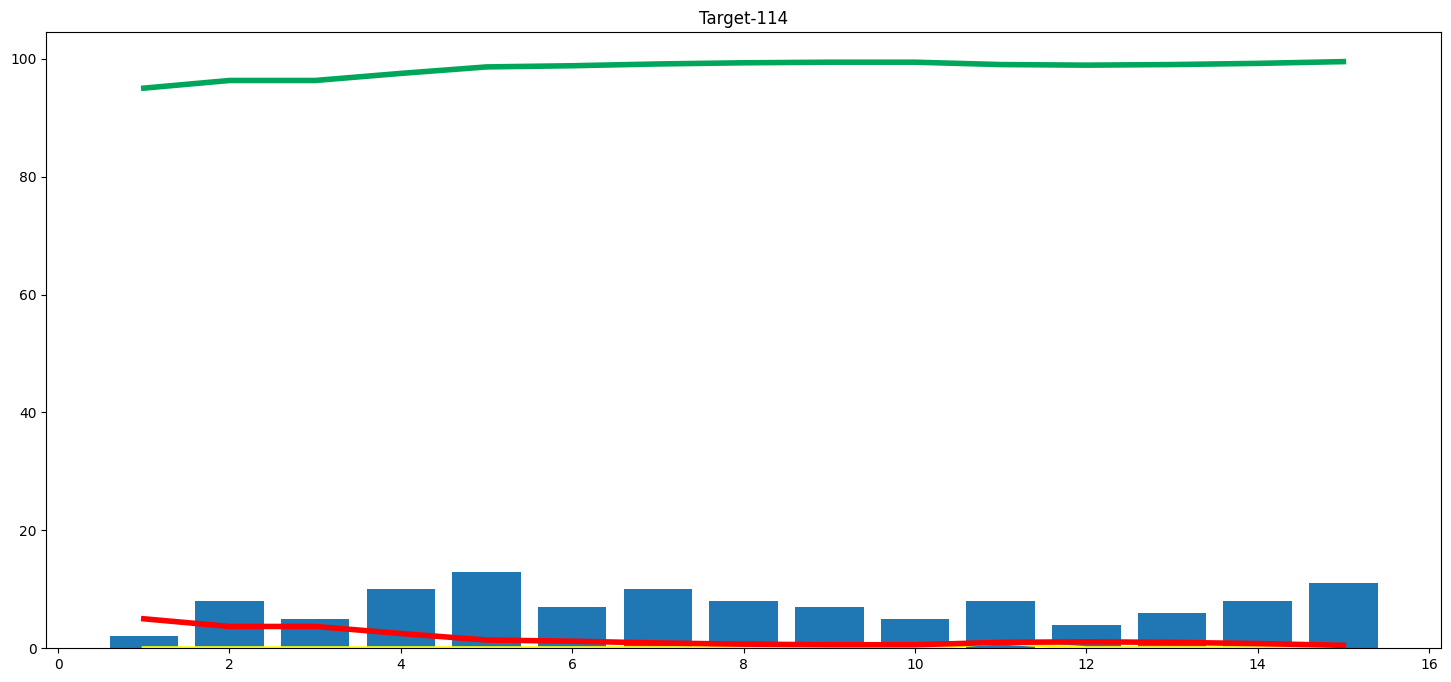

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))


In [ ]:
import matplotlib
print("Matplotlib version:", matplotlib.__version__)

Matplotlib version: 3.10.0


In [ ]:
teams

{'Mumbai Indians': 'Mumbai Indians',
 'Chennai Super Kings': 'Chennai Super Kings',
 'Kolkata Knight Riders': 'Kolkata Knight Riders',
 'Royal Challengers Bangalore': 'Royal Challengers Bangalore',
 'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
 'Rajasthan Royals': 'Rajasthan Royals',
 'Kings XI Punjab': 'Kings XI Punjab',
 'Punjab Kings': 'Kings XI Punjab',
 'Sunrisers Hyderabad': 'Sunrisers Hyderabad',
 'Deccan Chargers': 'Sunrisers Hyderabad',
 'Delhi Capitals': 'Delhi Capitals',
 'Delhi Daredevils': 'Delhi Capitals',
 'Gujarat Titans': 'Gujarat Titans',
 'Gujarat Lions': 'Gujarat Titans',
 'Lucknow Super Giants': 'Lucknow Super Giants'}

In [ ]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', 0],
      dtype=object)

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))